# ICAEW Data Analytics Certificate Programme Case Study (Analyst pathway)
## Decision making part 2

Welcome back to the Case Study for the ICAEW Data Analytics Certificate Programme (Analyst pathway). 

We have examined the journal data through exploratory data analysis to gain a deeper understanding of the data already. Now we will use the skills we have learnt within Unit 4. 


We'll use the journals dataset provided. The structure of this notebook is as follows:

- We will examine the control environment and identify any anomalies according to criteria. 
- We will identify local outliers using visual and statistical means.
- We will identify any global outliers using unsupervised learning techniques.


## Setting up the environment

First, we will load our clean journals data as we have done previously.

In [2]:
# Import the required package
import pandas as pd

# Load clean journals data as journals
journals = pd.read_excel('Journals2.xlsx')

## Scrutinise the control environment

A key area we have been told to consider when analysing the investment oppportunity is the control environment. This is an area where domain knowledge such as your understanding of key accounting processes and procedures can be used to supplement your analytical skills. In this section, we can investigate the controls in place within the organisation and can flag any journal entries that appear unusual.

In particular, we know from our exploratory analysis that there appear to be a number of employees who can authorise and prepare journals. We may wish to examine if these employees have ever authorised and prepared the same journal entries and what amounts each employee has authorised.

We looked at creating new conditional columns, filtering data and grouping data in Module 2 of Unit 3: Analysing the Data. If you purchased the learning and certificate Analyst Pathway, we recommend you revisit this content if you are struggling to complete these tasks.


In [8]:
# Create a new column which evaluates if journal preparer is identical to journal authoriser and call this column AuthIsRaiser
journals = journals.eval('AuthIsRaiser = JnlPrep == JnlAuth')
journals['AuthIsRaiser'] = journals['AuthIsRaiser'].astype(int) 


In [44]:
# Examine the journal entries which have the same authoriser and preparer
jAP = journals.loc[journals['AuthIsRaiser'] != 0, :]
print(jAP)

         Account                  AccountDesc TransDesc      Debit     Credit  \
414   00-80-8033  Provision for Sales Schemes       ZZX   61192.50       0.00   
415   00-10-1002     Provisions - Trade Sales       XXX       0.00   61192.50   
416   00-80-8033  Provision for Sales Schemes       ZZX  290889.34       0.00   
417   00-10-1001    Trade Sale Recycle Scheme       ZZZ       0.00  290889.34   
426   00-70-7026                    Bank Fees       684      26.22       0.00   
...          ...                          ...       ...        ...        ...   
3930  00-20-2011         Inventory Adjustment       622    4018.98       0.00   
3931  00-80-8027            Other Stock Costs       ZZZ    7905.21       0.00   
3932  00-20-2011         Inventory Adjustment       624       0.00    7905.21   
3933  00-20-2011         Inventory Adjustment       626       0.00   16101.95   
3934  00-80-8027            Other Stock Costs       ZZZ   16101.95       0.00   

       Period  JnlNo       

The following is assessed in the assessment.

We can create additional columns that test certain controls, such as if the Authoriser employee is the same as the Preparer employee. We can then filter the data for the case when this is True and then examine the number of employees.

In [57]:
# Examine the employees who have both authorised and prepared the same journals
jAP['JnlPreparerName'].unique()

array(['King Forkey \xa0', 'Ray Johansson \xa0', 'Jonelle Moseley \xa0'],
      dtype=object)

##### <b>Please take a note of the number of employees who have authorised and prepared the same journal entry.</b>

<i>Select here to type your answer: 3

Now let's consider the amount each employee has authorised and whether this is in line with our expectations according to the delegation of authority matrix. 

The following is assessed in the assessment.

We can examine if journal postings have been created in line with the delegation of authority matrix by using the business knowledge and context provided in the information prior to our analysis. 

In [60]:
# Group by Authoriser name and examine the maximum absolute amount authorised
journals.groupby(['JnlAuthoriserName'])['AbsAmount'].max()


JnlAuthoriserName
Johnny Hevey          888587.21
Jonelle Moseley       889896.65
King Forkey           997226.63
Lizbeth Arvin         887744.75
Maye Ahl              894362.91
Ray Johansson        1065322.15
Name: AbsAmount, dtype: float64

In [64]:
# Group by Preparer name and examine the maximum absolute amount prepared
journals.groupby(['JnlPreparerName'])['AbsAmount'].max()


JnlPreparerName
Evalyn Reddout           894260.65
Jon Mckinley             931222.48
Jonelle Moseley          885729.38
King Forkey              887749.65
Lakeisha Testerman       886534.71
Latasha Terpstra         599069.15
Lorelei Ory              887906.97
Merrill Benzel          1065322.15
Nellie Pease             893951.34
Ray Johansson            997226.63
Name: AbsAmount, dtype: float64

##### <b>Please take a note of whether there are anomalous journal entries in regards to the delegation of authority matrix.</b>

<i>Select here to type your answer: Ray Johansson is a fixed asset accountant and shouldn't approve journals over £1m

## Identifying local anomalies

In this course, we have examined multiple techniques for identifying local anomalies, i.e. anomalies across one field or columns only. Using these techniques, both visual and statistical, we will identify any anomalous journal entries based on when the journals were posted and the amount.



We have examined the identification of statistical anomalies and using visualisations in the anomaly detection section in Module 2 of Unit 4: Decision Making. If you purchased the learning and certificate Analyst Pathway, we recommend you revisit this content if you are struggling to complete these tasks.

In [67]:
# Import the required package
import datetime as dt

# Set the journal date time column to correct format
journals['JnlDateTime'] = pd.to_datetime(journals['JnlDateTime'], format = '%d/%m/%Y %H:%M')

# Create a column containing the hour when journal was posted called JnlTime
journals['JnlHour'] = journals['JnlDateTime'].dt.hour 

In [70]:
# Import visualisation packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The following is assessed in the assessment.

Visualisations such as boxplots can be created using the Seaborn package. We will need to create an additional column in our dataset for the hour the journal was posted.

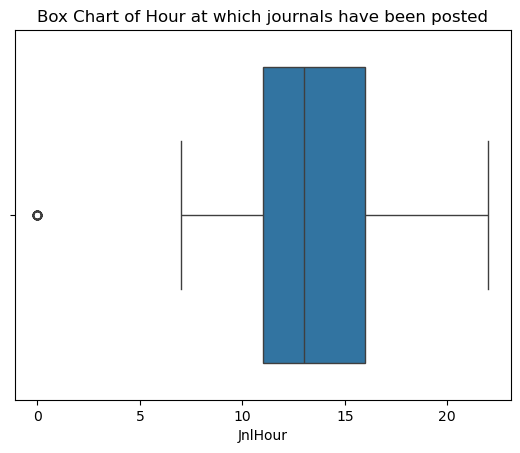

In [73]:
# Create a boxplot of the hour the journal was posted
sns.boxplot(x = 'JnlHour', data = journals)
plt.title('Box Chart of Hour at which journals have been posted')
plt.show()

##### <b>Please take a note of whether there are anomalous journal entries in regards to the time they were posted.</b>

<i>Select here to type your answer: Yes, one posted at midnight, also some others late at night

In [78]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Create a column with the zscore of Amount called zAmount
journals['ZAmount'] = zscore(journals['Amount'])

The following is assessed in the assessment.

Visualisations such as histograms can be created using the Seaborn package. We will need to create an additional column in our dataset for the z score of the amount.

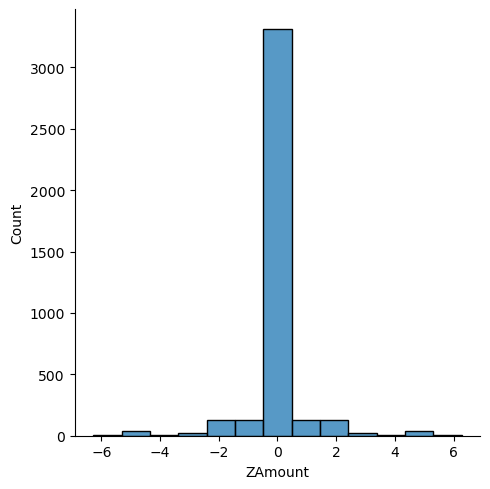

In [81]:
# Create a histogram of zAmount
sns.displot(journals['ZAmount'], binwidth = 1)

##### <b>Please take a note of whether there are anomalous journal entries in regards to the journal amount.</b>

<i>Select here to type your answer: Yes, amounts with z-score over abs(3) are deemed outliers as are too far from the mean

## Anomaly detection by unsupervised learning techniques

We've examined anomalies based on one field or criteria. Now we want to identify global anomalies, i.e. journal entries that are anomalous overall. Using techniques learnt in the course, we will flag any journal entries that appear anomalous across multiple fields. 

To do this we will use the previous wrangling script provided and load the wrangled data into this Notebook by switching the kernel to our wrangling Notebook as we have done previously.

In [64]:
# Import the data into the wrangling script

# Run the wrangling script 

# Change the kernel of this Notebook to the wrangling script

# Examine the journalsprePCA 
journalsprePCA.head()

,AbsAmount,NTrans,DoM,JnlTimeN,TotScore
JnlNo,,,,,
1,300859.89,4,1,13.07,1
10,12848.50,2,30,9.93,0
100,24839.41,2,30,16.92,1
101,22257.21,6,30,10.98,2
102,785539.06,4,30,9.38,1


## Principal Component Analysis

Now our data has been wrangled for analysis, we will first perform Principal Component Analysis in order to allow us to examine variation across multiple fields. We will transform our data from the current fields into Principal Components that will use data from across various fields to explain the variation in our dataset.

We can see how much variation these Principal Components explain as well as identifying which fields are incorporated into each Principal Component.

We covered using unsupervised learning techniques such as Principal Component Analysis to identify anomalies in the anomaly detection section in Module 2 of Unit 4: Decision Making. If you purchased the learning and certificate Analyst Pathway, we recommend you revisit this content if you are struggling to complete these tasks.

In [74]:
# Import the required packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [76]:
# Call the StandardScaler command scaler
scaler = StandardScaler()

# Call the PCA command pca 
pca = PCA()

# Make a pipleline of scaler and PCA called pipeline
pipeline = make_pipeline(scaler, pca)

In [79]:
# Fit the pipeline to the journalsprePCA dataset
pipeline.fit(journalsprePCA)


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

Text(0.5, 1.0, 'Bar Chart of Explained Variance')

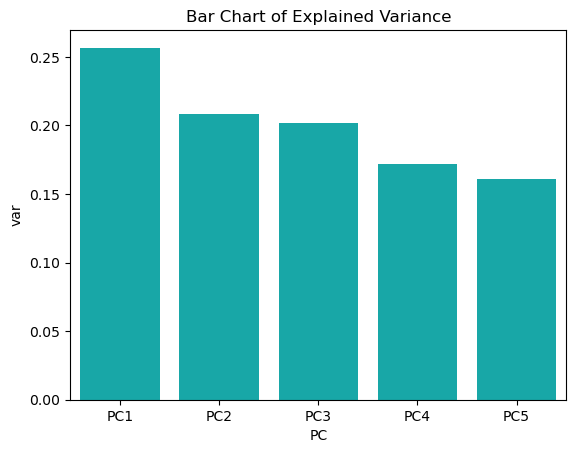

In [84]:
# Create a dataframe of the explained_variance_ratio_ from PCA called PCAvar
PCAvar = pd.DataFrame({'var': pca.explained_variance_ratio_,
                       'PC':['PC1','PC2','PC3','PC4','PC5']})

# Plot the explained variances
sns.barplot(x = 'PC', y = 'var', data = PCAvar, color = 'c')
plt.title('Bar Chart of Explained Variance')

The following is assessed in the assessment.

To perform Principal Component Analysis, we will use our wrangling script to produce the dataset we will load into our Notebook for PCA. We will then need to scale and perform PCA in a pipeline which we will fit to our data. To examine the effect of each field on the principal components, we will look at the loadings using the pca.components._T command.


In [89]:
# Save the loadings by saving components_.T from PCA with columns PC 1 to 5 and index equal to the journalsprePCA.columns as a dataframe called loadings
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4','PC5'], index = journalsprePCA.columns)

# Examine the loadings
loadings
#loadings indicate each variables effect on the principal component

,PC1,PC2,PC3,PC4,PC5
AbsAmount,-0.48,0.48,0.17,0.67,0.26
NTrans,0.59,0.18,0.18,0.48,-0.60
DoM,0.11,0.86,-0.11,-0.49,-0.05
JnlTimeN,-0.06,-0.03,0.96,-0.27,0.01
TotScore,0.64,0.04,0.06,0.12,0.76


##### <b>Please take a note of what field has the most effect on Principal Component 2.</b>

<i>Select here to type your answer: DoM

Now we have examined the effect of applying PCA to our data and have scrutinised the Principal Components, we can transform our data into these new components.

In [93]:
# Transform the data by using the fit_transform command of the pipeline on the journalsprePCA data and save this as PCAfeatures
PCAfeatures = pipeline.fit_transform(journalsprePCA)

In [95]:
# Create a dataframe, journalspostPCA, with the data being PCAfeatures and the columns as PCs 1 to 5 respectively and the index being the idnex of the prePCA journal data
journalspostPCA = pd.DataFrame(data = PCAfeatures, columns = ['PC1','PC2','PC3','PC4','PC5'], index = journalsprePCA.index)

# Examine the post PCA data
journalspostPCA.head()

,PC1,PC2,PC3,PC4,PC5
JnlNo,,,,,
1,-0.76,-1.78,0.05,0.87,0.33
10,-1.08,-0.03,-1.43,-0.94,-0.79
100,-0.40,-0.02,0.74,-1.36,0.22
101,0.92,0.20,-0.83,-0.39,0.79
102,-1.01,1.06,-1.10,0.75,0.50


## Clustering the data

Now we have transformed our data into components that capture the variation across multiple fields, we can identify global outliers in the data. We can use clustering to identify the clusters then isolate the outlying points from each cluster. These will be the most anomalous journals across the fields as a whole and we should scrutinise these further. 

First, we need to cluster the data into the optimal number of clusters, which in this case is 5 clusters.

We covered using unsupervised learning techniques such as clustering to identify anomalies in the anomaly detection section in Module 2 of Unit 4: Decision Making. If you purchased the learning and certificate Analyst Pathway, we recommend you revisit this content if you are struggling to complete these tasks.

Text(0.5, 1.0, 'Principal Component Analysis of Journals Data')

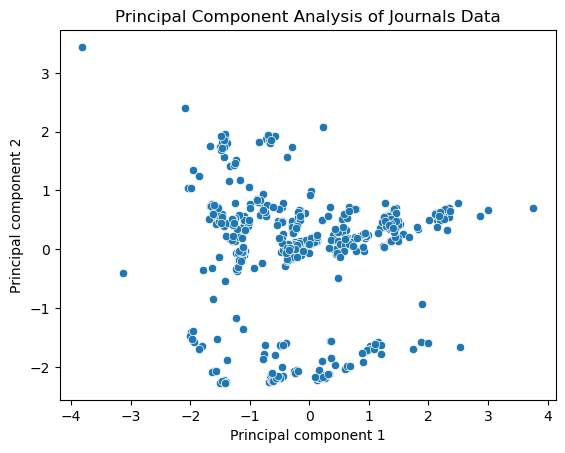

In [99]:
# Create a scattergraph of PC1 against PC2
sns.scatterplot(x = 'PC1', y = 'PC2', data = journalspostPCA)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal Component Analysis of Journals Data')

In [103]:
# Import the required packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [108]:
# Fit the StandardScaler command to journalspostPCA and call the result scaler
scaler = StandardScaler().fit(journalspostPCA)

# Transform journalspostPCA using scaler and call the result scaledjournals
scaledjournals = scaler.transform(journalspostPCA)

In [114]:
# Define kmeans to be KMeans with 5 clusters fitted to the scaledjournals
kmeans = KMeans(n_clusters=5).fit(scaledjournals)
# Define labels to be kmeans fit_predict to the scaledjournals
labels = kmeans.fit_predict(scaledjournals)

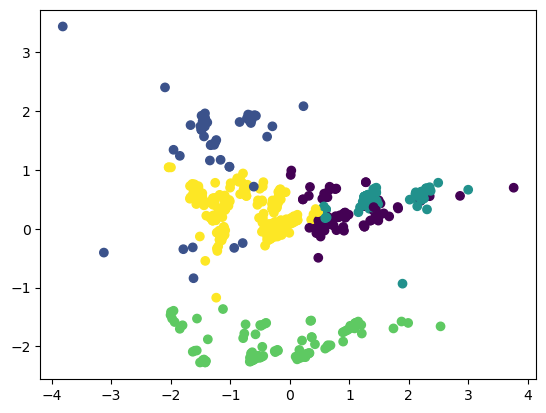

In [122]:
# Create a scatterplot of the PC1 and PC2 with colour signfying labels
plt.scatter(x = 'PC1', y = 'PC2', data = journalspostPCA, c=labels)

Now we have clustered our data, we can pick out the anomalous journals by using the centroids of the cluster. These will be the anomalous journals across all fields in the dataset and as such will be our global outliers.

In [124]:
# Obtain predictions and calculate distance from cluster centroid
J_clusters = kmeans.predict(scaledjournals)
J_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(scaledjournals, J_clusters_centers[J_clusters])]

# Create fraud predictions based on outliers on clusters 
anomalies = np.array(dist)
anomalies[dist >= np.percentile(dist, 99)] = 1
anomalies[dist < np.percentile(dist, 99)] = 0

Text(0.5, 1.0, 'Anomalies based on Clustering')

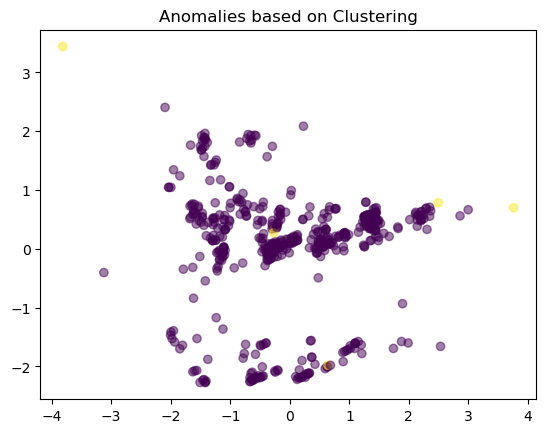

In [130]:
# Scatterplot of PC1 and PC2 in journalspostPCA with colour signifying anomalies
plt.scatter(x = 'PC1', y = 'PC2', data = journalspostPCA,c=anomalies, alpha=0.5)
plt.title("Anomalies based on Clustering")
#Yellow = anomalous ie =1.

The following is assessed in the assessment.

We first need to transform our data into the results of the PCA by using the fit_transform command of the pipeline and saving this dataset to perform clustering on. It is helpful to save our data in a pandas DataFrame for ease when handling, with the columns specified and index given. We can then scale our data by fitting and transforming our scaler and saving this data to cluster with. We use KMeans clustering with five clusters to fit the data and can then use the cluster centroids to identify anomalies.

In [137]:
# Examine the anomalies in the journalspostPCA dataset i.e. when rows where anomalies==1
anomalies.sum()


6.0

##### <b>Please take a note of the number of anomalous journals according to the clustering.</b>

<i>Select here to type your answer: 6

In [142]:
# Select the journal numbers, i.e the index of these anomalies, and call them anomalousjournals
indices = [i for i, x in enumerate(anomalies) if x == 1]
print(indices)

[110, 114, 344, 369, 391, 531]


In [156]:
# Examine the journals with the anomalous journal numbers
journals1 = pd.DataFrame(journals, index = indices)
print(journals1)


        Account            AccountDesc TransDesc    Debit  Credit  Period  \
110  00-80-8027      Other Stock Costs       ZZZ     0.00  945.54  2019-3   
114  00-80-8027      Other Stock Costs       ZZZ     0.00 5574.58  2019-3   
344  00-80-8037  Forex Holding Account       849     0.00 1385.41  2019-4   
369  00-70-7023  Forex - Realised Diff      1208 12074.25    0.00  2019-4   
391  00-70-7022  Forex - Realised Diff       123     0.00  122.14  2019-4   
531  00-80-8027      Other Stock Costs       ZZZ     0.00 7682.80  2019-4   

    JnlNo JnlDesc   Amount JnlPrep  ... AuthIsRaiser JnlDescBlank JnlOOH  \
110   114     NaN  -945.54    HV09  ...            0            1      0   
114   114     NaN -5574.58    HV09  ...            0            1      0   
344   143     NaN -1385.41    CH20  ...            0            1      1   
369   144     NaN 12074.25    AS13  ...            0            1      0   
391   149     NaN  -122.14    DF18  ...            0            1      0   
531 

##### Assessment guidance

You are ready to take the assessment.

Remember, you should have fully completed your task and recorded your answers in Jupyter Notebook before moving on to the assessment. You can keep your Jupyter Notebook open in a separate browser window to refer to as you take the assessment.  

You will receive a score following completion of the assessment. If you have scored below the target mark of 60% for the section, you are recommended to refresh your knowledge in the course content (if purchased) and rework your Jupyter Notebook before re-attempting the assessment. You have a maximum of three assessment attempts.

You should aim to achieve a target score of 60% in each section of the case study. To pass the case study and be awarded the ICAEW Certificate, you are required to achieve a pass mark of 60% overall, averaged over all five sections, so do not be disheartened if you score below 60% in any one section, as a higher score in one or more of the other sections will contribute to the overall pass mark of 60%.

IMPORTANT: When submitting to the assessment portal, please do not navigate away from it until you have submitted all of your answers for that task. In between any of your 3 assessment attempts (but not during an attempt) you may navigate back to the course content, if you have purchased it, to refresh your knowledge and revisit your Jupyter Notebook to rework your analysis.